# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
#Importing the basic libraries
import pandas as pd
import numpy as np

#Importing the necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
# import our dataset
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [4]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# first 10 observations of our dataset
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [6]:
data.shape

(32560, 15)

In [7]:
# Check for Null Data
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
# Get data types
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

#applying LabelEncoder to the Income column to make the understanding easier
labelEncoder = LabelEncoder()
data['Income'] = labelEncoder.fit_transform(data['Income'])

In [10]:
data.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [11]:
#Checking the percentage of data is missing from the dataset

total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,0,0.0
Workclass,0,0.0
Fnlwgt,0,0.0
Education,0,0.0
Education_num,0,0.0


In [12]:
#Since a very small amount of data is missing, we can replace the null values with the mode of each column

data['Occupation'].describe()

count               32560
unique                 15
top        Prof-specialty
freq                 4140
Name: Occupation, dtype: object

In [13]:
#Since mode is Prof-specialty, replacing null values with it

data['Occupation'] = data['Occupation'].fillna('Prof-specialty')

In [14]:
data['Workclass'].describe()

count        32560
unique           9
top        Private
freq         22696
Name: Workclass, dtype: object

In [15]:
#Since mode is Private, replacing null values with it

data['Workclass'] = data['Workclass'].fillna('Private')

In [16]:
data['Native_country'].describe()

count              32560
unique                42
top        United-States
freq               29169
Name: Native_country, dtype: object

In [17]:
#Since mode is United-States, replacing null values with it

data['Native_country'] = data['Native_country'].fillna('United-States')

In [18]:
#Mean, Median, Minimum , Maximum values etc can be found

data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [19]:
data.describe(include=["O"])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
count,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27815,21789,29169


In [20]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

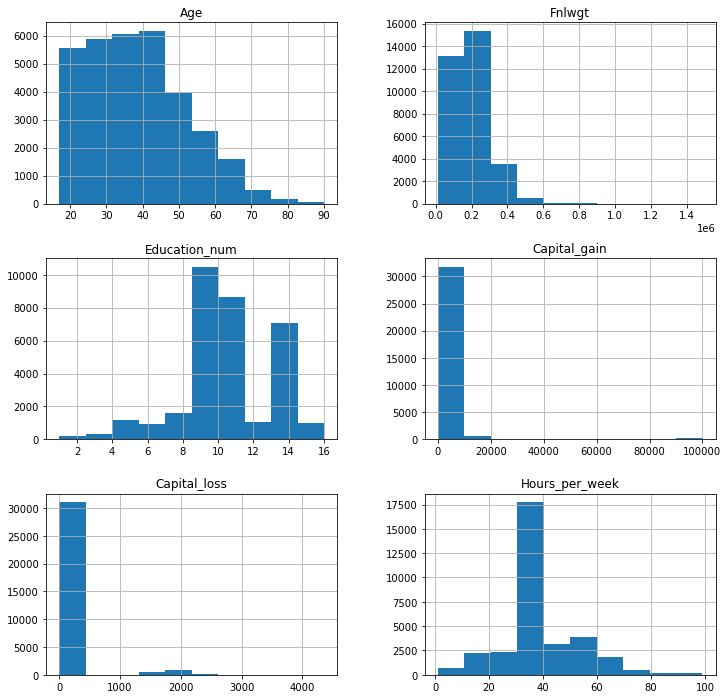

In [21]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 12
data[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

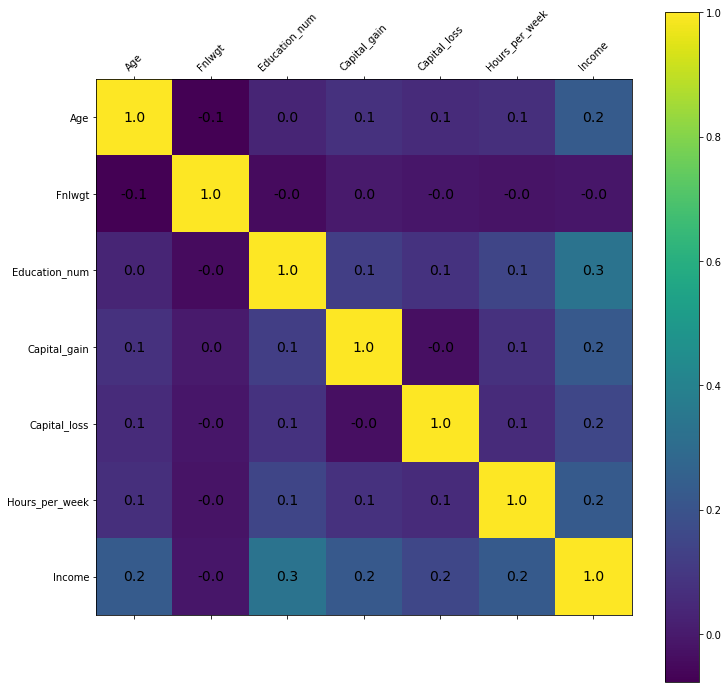

In [22]:
#Ploting the correlation between the output(income) and individual features

plt.matshow(data.corr())
plt.colorbar()
plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(data.corr().columns)), data.corr().columns.values) 
for (i, j), corr in np.ndenumerate(data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='black', fontsize=14)

In [23]:
#Since it has 0 correlation, it can be dropped

data.drop(['Fnlwgt'], axis = 1, inplace = True)

In [24]:
census_data=data.copy()

In [25]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

census_data['Age'] = pd.cut(census_data['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Income', ylabel='count'>

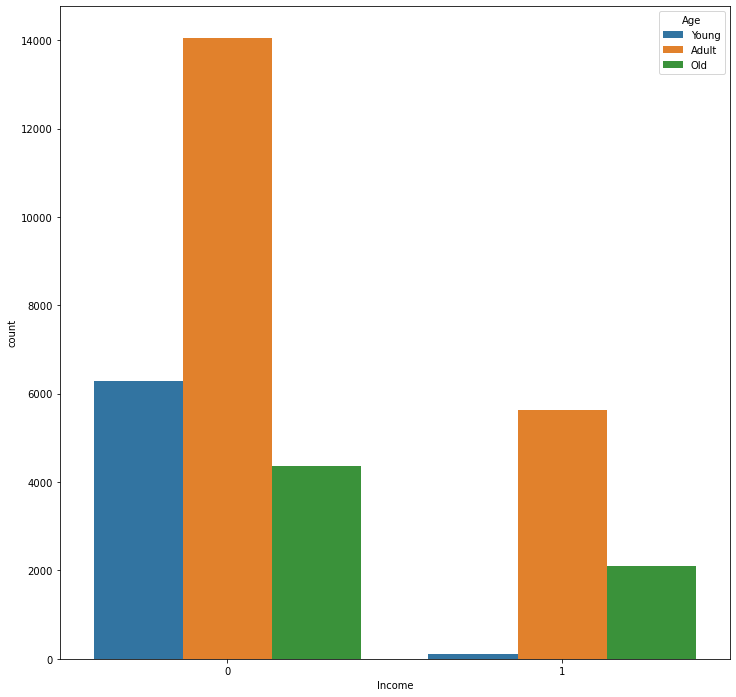

In [26]:
sns.countplot(x = 'Income', hue = 'Age', data = census_data)

In [27]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

census_data['Capital Diff'] = census_data['Capital_gain'] - census_data['Capital_loss']
census_data.drop(['Capital_gain'], axis = 1, inplace = True)
census_data.drop(['Capital_loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Income', ylabel='count'>

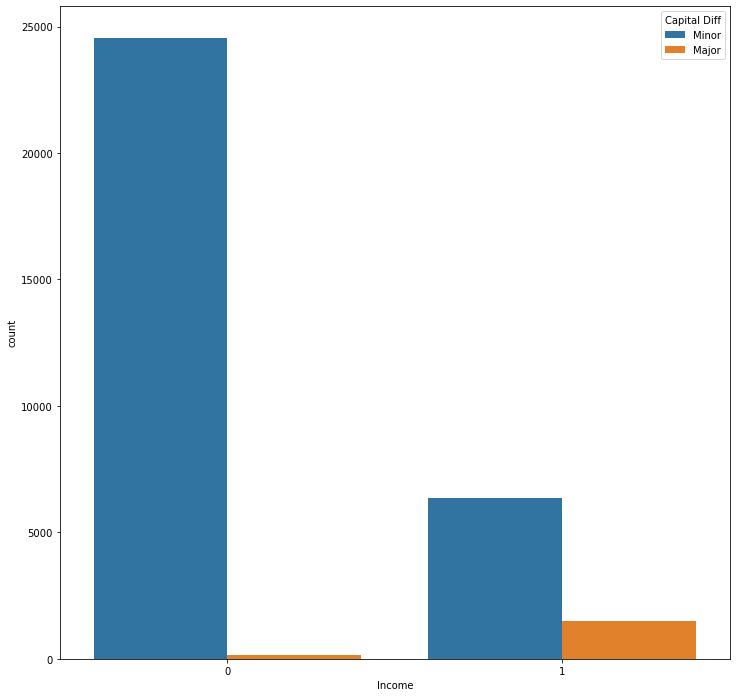

In [28]:
census_data['Capital Diff'] = pd.cut(census_data['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Income', hue = 'Capital Diff', data = census_data)

In [29]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

census_data['Hours per Week'] = pd.cut(census_data['Hours_per_week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='Income', ylabel='count'>

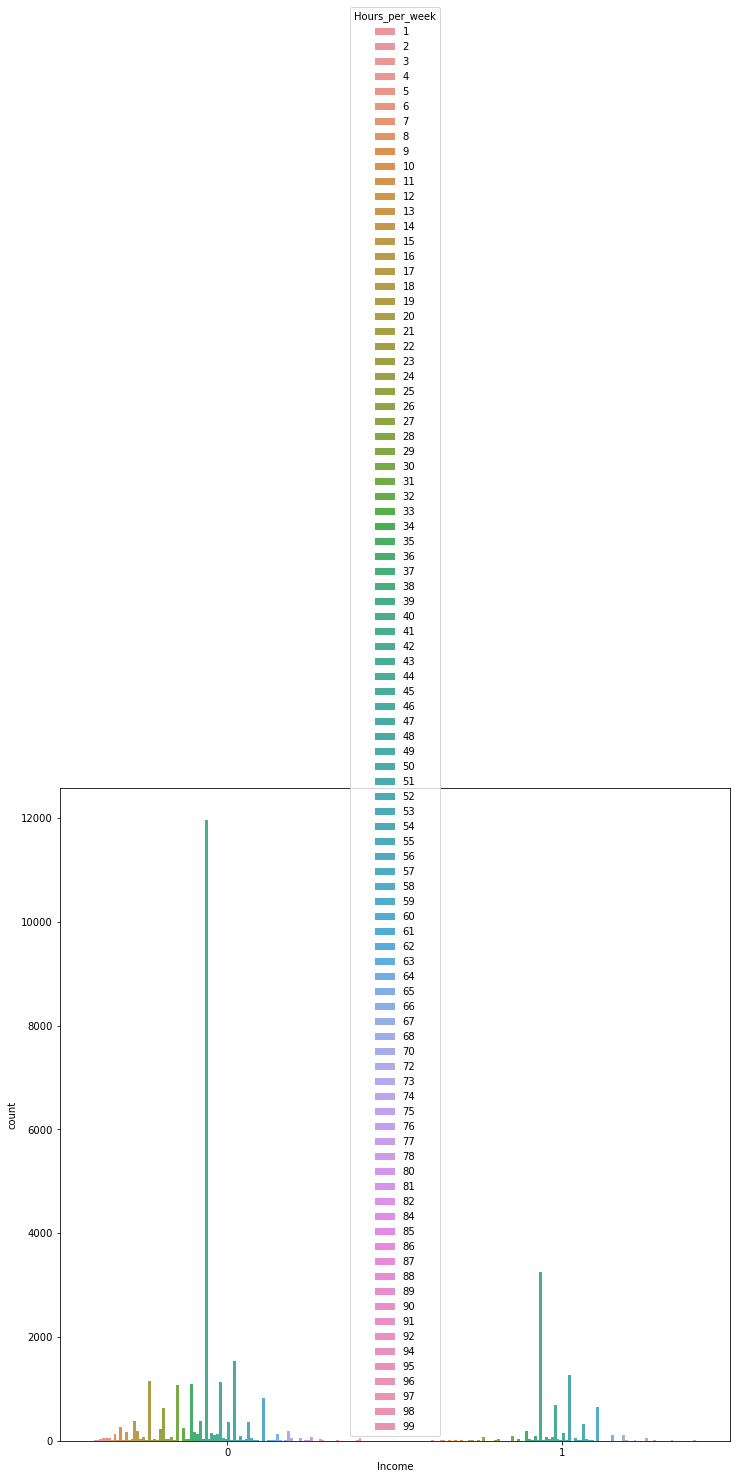

In [30]:
sns.countplot(x = 'Income', hue = 'Hours_per_week', data = census_data)

<AxesSubplot:xlabel='Income', ylabel='count'>

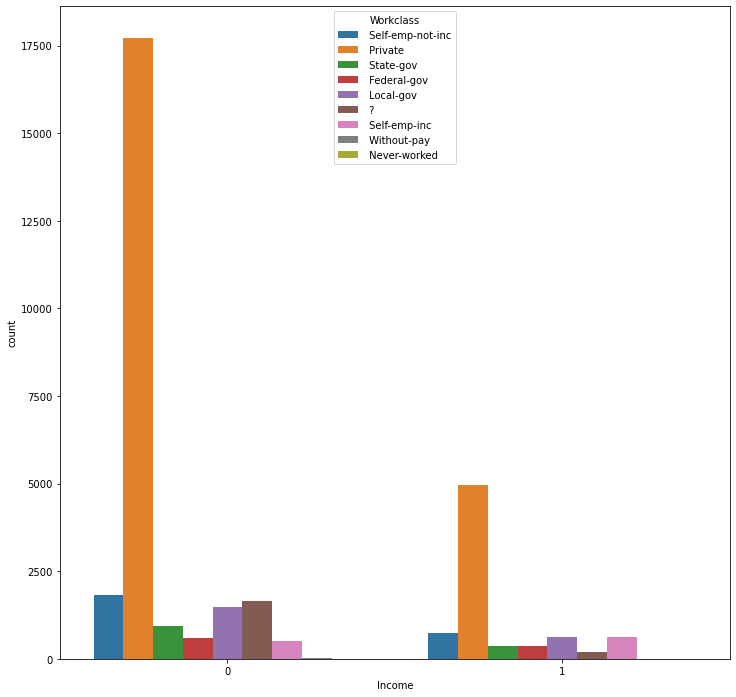

In [31]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'Income', hue = 'Workclass', data = census_data)

<AxesSubplot:xlabel='Income', ylabel='count'>

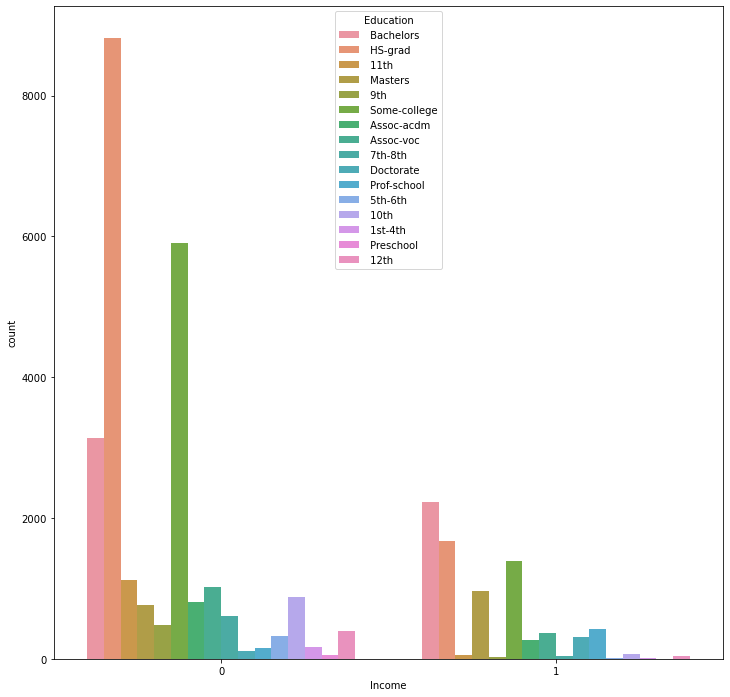

In [32]:
#Plot of education corresponding to income

sns.countplot(x = 'Income', hue = 'Education', data = census_data)

In [33]:
#Combining the lower grades of education together

data.drop(['Education_num'], axis = 1, inplace = True)
data['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

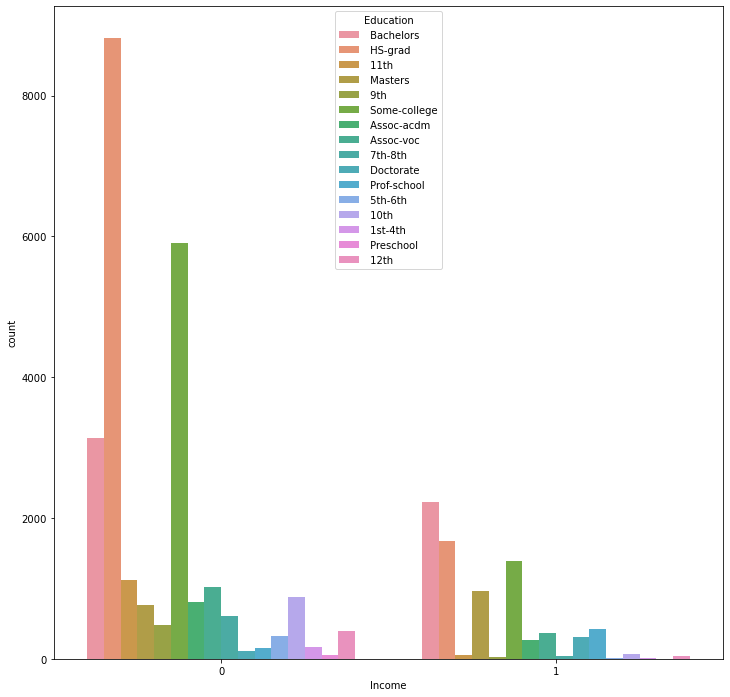

In [34]:
sns.countplot(x = 'Income', hue = 'Education', data = data)

<AxesSubplot:xlabel='Income', ylabel='count'>

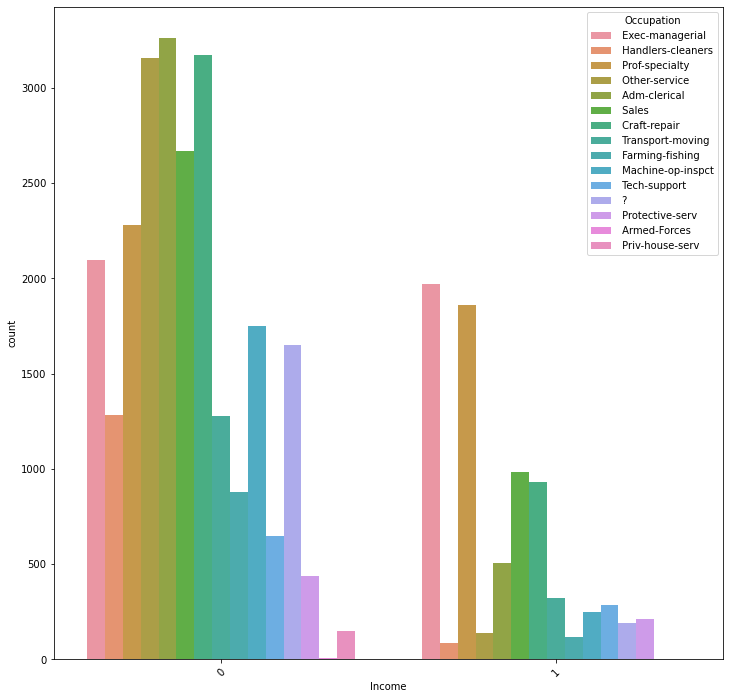

In [35]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'Income', hue = 'Occupation', data = census_data)

<AxesSubplot:xlabel='Income', ylabel='count'>

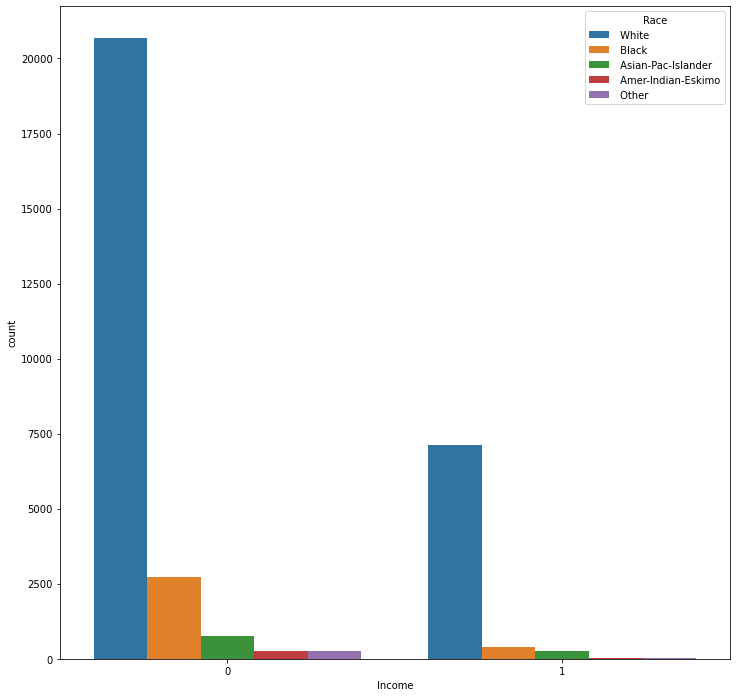

In [36]:
sns.countplot(x = 'Income', hue = 'Race', data = census_data)

In [37]:
#Since majority of race is white, the rest of races can be combined together to form a new group

data['Race'].unique()
data['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

<AxesSubplot:xlabel='Income', ylabel='count'>

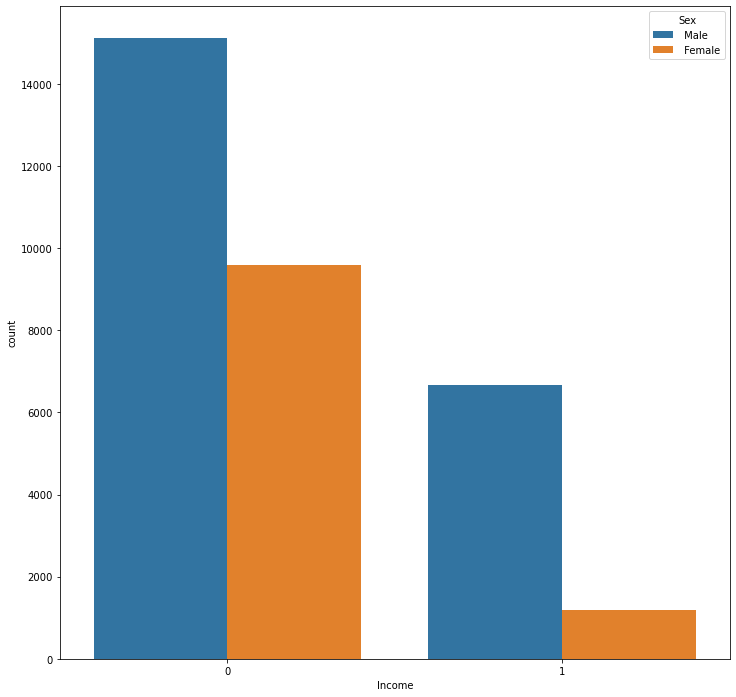

In [38]:
#Plot of sex corresponding to income

sns.countplot(x = 'Income', hue = 'Sex', data = census_data)

In [39]:
count = census_data['Native_country'].value_counts()
count

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Text(0.5, 1.0, 'Count from each Country')

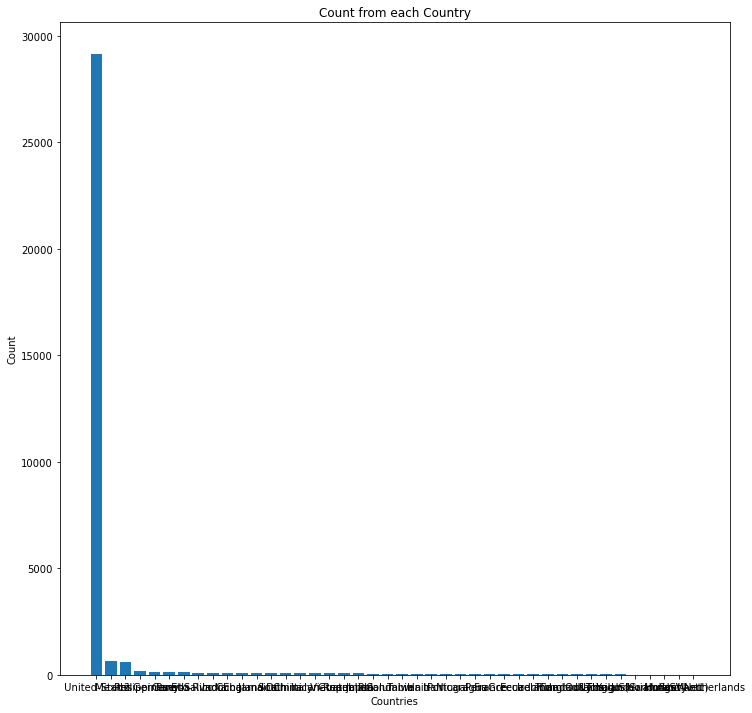

In [40]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')

In [41]:
#Combining all other into one class

countries = np.array(census_data['Native_country'].unique())
countries = np.delete(countries, 0)

In [42]:
census_data['Native_country'].replace(countries, 'Other', inplace = True)
data['Native_country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

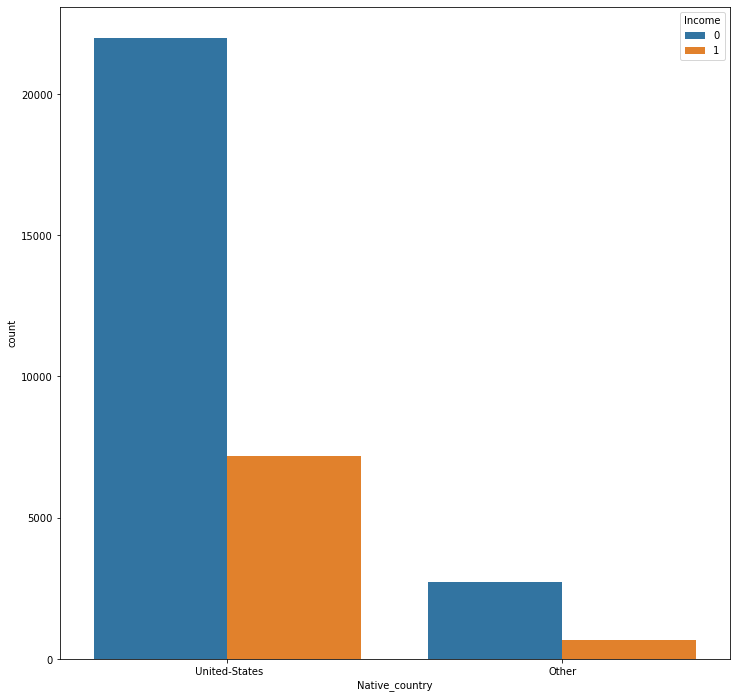

In [43]:
sns.countplot(x = 'Native_country', hue = 'Income', data = census_data)

In [44]:
#Splitting the data set into features and outcome

x = data.drop(['Income'], axis=1)
y = data['Income']

In [45]:
x.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [46]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [47]:
from sklearn import preprocessing

categorical = ['Workclass','Education', 'Marital_status', 'Occupation', 'Relationship','Race', 'Sex','Native_country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])

In [48]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)

x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [49]:
x_train.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,-0.336716,0.089544,0.184199,0.925789,-1.318126,-0.276382,0.394065,-1.428802,-0.146745,-0.216416,-0.038032,-0.342883
1,1.501314,0.089544,-2.144300,-1.739592,1.759612,0.345898,-1.967713,0.699887,-0.146745,-0.216416,-0.444943,-0.342883
2,-1.292492,0.089544,0.184199,0.925789,0.102368,0.968179,-1.967713,-1.428802,-0.146745,-0.216416,-0.038032,-0.342883
3,0.913144,0.089544,-0.850689,-1.739592,-0.607879,1.590459,0.394065,0.699887,-0.146745,-0.216416,1.182703,2.916444
4,1.280751,0.774802,-1.368134,-0.406902,-0.844628,-0.898663,0.394065,0.699887,-0.146745,-0.216416,0.775791,-0.342883


In [50]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [51]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

In [52]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [53]:
#Applying the GaussianNB algorithm

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [54]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

In [55]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [56]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
97.91,Decision Tree
97.90,Random Forest
89.38,KNN
80.52,Support Vector Machines
80.28,Logistic Regression
79.67,Naive Bayes


In [57]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [58]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

In [59]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.42
Support Vector Classifier:
F1 score: 0.51
Decision Tree Classifier:
F1 score: 0.61
Random Forest Classifier:
F1 score: 0.66
Gradient Boosting Classifier:
F1 score: 0.68


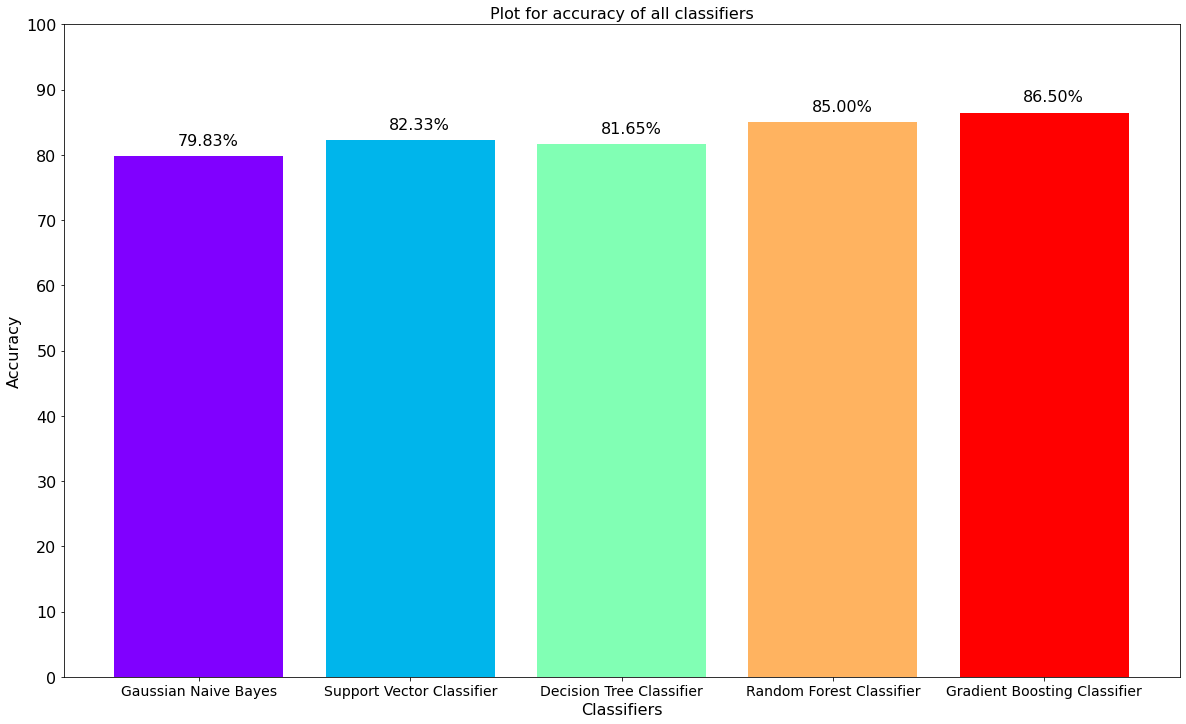

In [60]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

In [61]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Age,0.224
Capital_gain,0.138
Relationship,0.124
Hours_per_week,0.110
Education,0.105
Occupation,0.098
Marital_status,0.061
Workclass,0.053
Capital_loss,0.044


<AxesSubplot:xlabel='feature'>

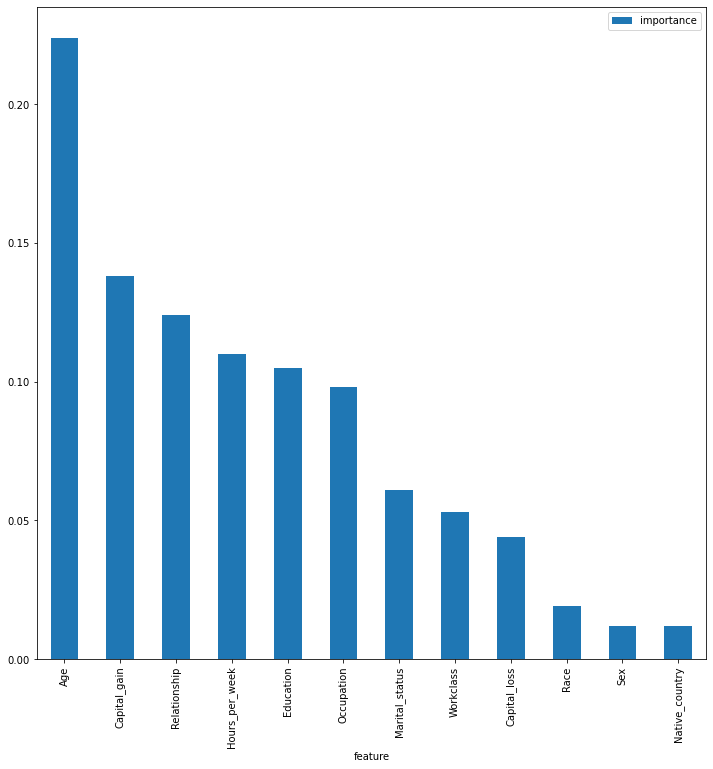

In [62]:
#Plotting the significance of each feautre

importances.plot.bar()

In [63]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

data  = data.drop("Sex", axis=1)
data  = data.drop("Race", axis=1)
data  = data.drop("Native_country", axis=1)

In [64]:
#The accuracy remains the same even after dropping the columns

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train, y_train)
y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.91 %


Thus, in this project, we cleaned the data, carried out EDA extensively and understood all the parameters in this process and successfully applied multiple classification algorithms to predict the required output!

In [65]:
from joblib import Parallel, delayed
import joblib

#Saving the best model
joblib.dump(acc_random_forest, 'Census_Income_Project.pkl')

['Census_Income_Project.pkl']